In [52]:
from __future__ import print_function
# pylint: disable=protected-access,import-error
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout


In [53]:
from tensorflow.keras.datasets import cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [54]:
('Training data shape : ', train_images.shape, train_labels.shape)


('Training data shape : ', (50000, 32, 32, 3), (50000, 1))

In [55]:
('Testing data shape : ', test_images.shape, test_labels.shape)

('Testing data shape : ', (10000, 32, 32, 3), (10000, 1))

In [56]:
Classes = np.unique(train_labels)
nClasses = len(Classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', Classes)
plt.figure(figsize=[4,2])

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


<Figure size 288x144 with 0 Axes>

<Figure size 288x144 with 0 Axes>

Text(0.5, 1.0, 'Ground Truth : [6]')

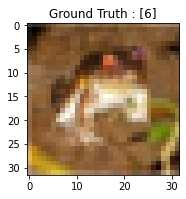

In [57]:
plt.subplot(121)
plt.imshow(train_images[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_labels[0]))

Text(0.5, 1.0, 'Ground Truth : [3]')

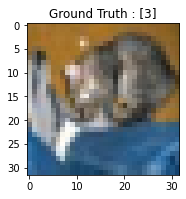

In [58]:
plt.subplot(122)
plt.imshow(test_images[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_labels[0]))

In [59]:
nRows, nCols, nDims = train_images.shape[1:]
train_data = train_images.reshape(train_images.shape[0], nRows, nCols, nDims)
test_data = test_images.reshape(test_images.shape[0], nRows, nCols, nDims)
input_shape = (nRows, nCols, nDims)

In [60]:
train_data = train_data.astype('float32')
test_data = test_data.astype('float32')

In [61]:
train_data /= 255
test_data /= 255
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

In [68]:
print('Original label 0 : ', train_labels[0])
print('After conversion to categorical ( one-hot ) : ', train_labels_one_hot)


Original label 0 :  [6]
After conversion to categorical ( one-hot ) :  [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [69]:
input_shape = (32,32,3)

def createModel():
    # Use list-based initialization to avoid TensorShape proto error
    model = Sequential([
        Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape),
        Conv2D(32, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),
        
        Conv2D(64, (3, 3), padding='same', activation='relu'),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),
        
        Flatten(),
        Dense(512, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])
    
    return model

In [70]:

nClasses = 10

In [72]:
model1 = createModel()
batch_size = 256
epochs = 50
model1.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

TypeError: Parameter to MergeFrom() must be instance of same class: expected tensorflow.TensorShapeProto got tensorflow.TensorShapeProto.

In [73]:
history = model1.fit(train_data, train_labels_one_hot, batch_size=batch_size, epochs=epochs, verbose=1, 
                     validation_data=(test_data, test_labels_one_hot))
model1.evaluate(test_data, test_labels_one_hot)


NameError: name 'model1' is not defined